In [28]:
!pip install plottable

In [29]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 

from plottable import ColumnDefinition, Table
from plottable.cmap import  normed_cmap
from plottable.plots import image

from highlight_text import fig_text, ax_text

In [30]:
df_table = pd.read_html('https://fbref.com/en/comps/24/Serie-A-Estatisticas')[0]

In [31]:
df_table.head(5)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Palmeiras,38,20,10,8,64,33,31,70,1.84,57.2,39.3,17.9,0.47,22462,Endrick - 11,Wéverton,NaN
1,2,Grêmio,38,21,5,12,63,56,7,68,1.79,50.0,55.3,-5.3,-0.14,20527,Luis Suárez - 17,Gabriel Chapecó,NaN
2,3,Atlético Mineiro,38,19,9,10,52,32,20,66,1.74,46.6,40.8,5.8,0.15,15020,Paulinho - 20,Éverson,NaN
3,4,Flamengo,38,19,9,10,56,42,14,66,1.74,49.8,45.1,4.7,0.12,34644,Pedro - 13,Matheus Cunha,NaN
4,5,Botafogo (RJ),38,18,10,10,58,37,21,64,1.68,50.2,48.9,1.3,0.03,22125,Tiquinho Soares - 17,Lucas Perri,NaN


In [32]:
#Traduzir as Colunas
colunas_trad = {
    'Rk' : 'Cl',
    'Squad' : 'Equipe',
    'MP': 'MP',
    'W': 'V',
    'D': 'E',
    'L': 'D',
    'GF': 'GP',
    'GA': 'GC',
    'GD': 'SG',
    'Pts': 'Pt',
    'Pts/MP': 'Pts/PPJ',
    'xG': 'xG',
    'xGA': 'xGA',
    'xGD': 'xGD',
    'xGD/90':'xGD/90'
}


df_table = df_table[list(colunas_trad.keys())].rename(columns=colunas_trad)
df_table

,Cl,Equipe,MP,V,E,D,GP,GC,SG,Pt,Pts/PPJ,xG,xGA,xGD,xGD/90
0,1,Palmeiras,38,20,10,8,64,33,31,70,1.84,57.2,39.3,17.9,0.47
1,2,Grêmio,38,21,5,12,63,56,7,68,1.79,50.0,55.3,-5.3,-0.14
2,3,Atlético Mineiro,38,19,9,10,52,32,20,66,1.74,46.6,40.8,5.8,0.15
3,4,Flamengo,38,19,9,10,56,42,14,66,1.74,49.8,45.1,4.7,0.12
4,5,Botafogo (RJ),38,18,10,10,58,37,21,64,1.68,50.2,48.9,1.3,0.03
5,6,Bragantino,38,17,11,10,49,35,14,62,1.63,57.8,42.6,15.2,0.40
6,7,Fluminense,38,16,8,14,51,47,4,56,1.47,50.3,48.3,2.0,0.05
7,8,Ath Paranaense,38,14,14,10,51,43,8,56,1.47,51.1,46.6,4.5,0.12
8,9,Internacional,38,15,10,13,46,45,1,55,1.45,42.2,47.1,-4.9,-0.13
9,10,Fortaleza,38,15,9,14,45,44,1,54,1.42,51.4,43.8,7.5,0.20


In [33]:
escudos = pd.read_csv('D:/pythonProject/Tutoriais/data/raw/times_br23.csv', delimiter=';')
escudos

,Escudo,Equipe,team_id
0,1757,América (MG),1228
1,10273,Ath Paranaense,1243
2,10272,Atlético Mineiro,1235
3,7877,Bahia,1221
4,8517,Botafogo (RJ),1227
5,9808,Corinthians,1237
6,9767,Coritiba,1236
7,9781,Cruzeiro,1230
8,197815,Cuiabá,8938
9,9770,Flamengo,1239


In [34]:
df = pd.merge(df_table, escudos, on='Equipe', how='left')
df

,Cl,Equipe,MP,V,E,D,GP,GC,SG,Pt,Pts/PPJ,xG,xGA,xGD,xGD/90,Escudo,team_id
0,1,Palmeiras,38,20,10,8,64,33,31,70,1.84,57.2,39.3,17.9,0.47,10283,1234
1,2,Grêmio,38,21,5,12,63,56,7,68,1.79,50.0,55.3,-5.3,-0.14,9769,1244
2,3,Atlético Mineiro,38,19,9,10,52,32,20,66,1.74,46.6,40.8,5.8,0.15,10272,1235
3,4,Flamengo,38,19,9,10,56,42,14,66,1.74,49.8,45.1,4.7,0.12,9770,1239
4,5,Botafogo (RJ),38,18,10,10,58,37,21,64,1.68,50.2,48.9,1.3,0.03,8517,1227
5,6,Bragantino,38,17,11,10,49,35,14,62,1.63,57.8,42.6,15.2,0.40,109705,5438
6,7,Fluminense,38,16,8,14,51,47,4,56,1.47,50.3,48.3,2.0,0.05,9863,1232
7,8,Ath Paranaense,38,14,14,10,51,43,8,56,1.47,51.1,46.6,4.5,0.12,10273,1243
8,9,Internacional,38,15,10,13,46,45,1,55,1.45,42.2,47.1,-4.9,-0.13,8702,1219
9,10,Fortaleza,38,15,9,14,45,44,1,54,1.42,51.4,43.8,7.5,0.20,8287,2065


In [35]:
from PIL import Image
import urllib
import pandas as pd


fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'

# Função para baixar as imagens
def baixar_brasao(escudo_id):
    try:
        url = f"{fotmob_url}{escudo_id}.png"
        imagem = Image.open(urllib.request.urlopen(url))
        return imagem
    except Exception as e:
        print(f"Erro ao baixar a imagem para o escudo {escudo_id}: {str(e)}")
        return None

# Adicionando a coluna 'Brasao' ao DataFrame
df['Brasao'] = df['Escudo'].apply(baixar_brasao)


print(df)

    Cl  ...                                             Brasao
0    1  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
1    2  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
2    3  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
3    4  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
4    5  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
5    6  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
6    7  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
7    8  ...  <PIL.PngImagePlugin.PngImageFile image mode=RG...
8    9  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
9   10  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
10  11  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
11  12  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
12  13  ...  <PIL.PngImagePlugin.PngImageFile image mode=P ...
13  14  ...  <PIL.PngImagePlugin.PngImageFile image mode=RG...
14  15  ...  <PIL.PngImagePlugin.PngImageFile image mod

In [36]:
df

,Cl,Equipe,MP,V,E,D,GP,GC,SG,Pt,Pts/PPJ,xG,xGA,xGD,xGD/90,Escudo,team_id,Brasao
0,1,Palmeiras,38,20,10,8,64,33,31,70,1.84,57.2,39.3,17.9,0.47,10283,1234,<PIL.PngImagePlugin.PngImageFile image mode=P ...
1,2,Grêmio,38,21,5,12,63,56,7,68,1.79,50.0,55.3,-5.3,-0.14,9769,1244,<PIL.PngImagePlugin.PngImageFile image mode=P ...
2,3,Atlético Mineiro,38,19,9,10,52,32,20,66,1.74,46.6,40.8,5.8,0.15,10272,1235,<PIL.PngImagePlugin.PngImageFile image mode=P ...
3,4,Flamengo,38,19,9,10,56,42,14,66,1.74,49.8,45.1,4.7,0.12,9770,1239,<PIL.PngImagePlugin.PngImageFile image mode=P ...
4,5,Botafogo (RJ),38,18,10,10,58,37,21,64,1.68,50.2,48.9,1.3,0.03,8517,1227,<PIL.PngImagePlugin.PngImageFile image mode=P ...
5,6,Bragantino,38,17,11,10,49,35,14,62,1.63,57.8,42.6,15.2,0.40,109705,5438,<PIL.PngImagePlugin.PngImageFile image mode=P ...
6,7,Fluminense,38,16,8,14,51,47,4,56,1.47,50.3,48.3,2.0,0.05,9863,1232,<PIL.PngImagePlugin.PngImageFile image mode=P ...
7,8,Ath Paranaense,38,14,14,10,51,43,8,56,1.47,51.1,46.6,4.5,0.12,10273,1243,<PIL.PngImagePlugin.PngImageFile image mode=RG...
8,9,Internacional,38,15,10,13,46,45,1,55,1.45,42.2,47.1,-4.9,-0.13,8702,1219,<PIL.PngImagePlugin.PngImageFile image mode=P ...
9,10,Fortaleza,38,15,9,14,45,44,1,54,1.42,51.4,43.8,7.5,0.20,8287,2065,<PIL.PngImagePlugin.PngImageFile image mode=P ...


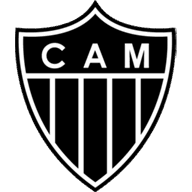

In [37]:
df['Brasao'][2]

In [38]:
#Selecionar as colunas para serem usadas
df[['xG', 'xGA', 'xGD', 'xGD/90']] = df[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

df = df[[
    'Cl', 'Brasao', 'Equipe', 'MP', 'V', 'E', 'D', 'GP', 'GC', 'SG', 'Pt', 'Pts/PPJ', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [39]:
import os
import matplotlib.font_manager as fm 
from mplsoccer import FontManager

bg_color = "#FFFAFA"
text_color = "#000000"

row_colors = {
    "Libertadores"  : "#9ACD32",
    "Pre"           : "#FFDEAD",
    "Queda"         : "#FF6347",
    "Sula"          : "#7FFFD4",
    "Nada"          : "#F8F8FF",
}

font_path = 'D:/pythonProject/Tutoriais/utils/fonts/'
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue


plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = 'Karla'
#plt.rcParams["font.family"] = "monospace"

font_normal = FontManager("https://github.com/google/fonts/raw/main/ofl/roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://github.com/google/fonts/raw/main/ofl/roboto/Roboto-Italic%5Bwdth,wght%5D.ttf")

In [40]:
col_defs = [
    ColumnDefinition(
        name="Cl",#Nome da Coluna
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Brasao",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=lambda ax, img: ax.imshow(img),
        #plot_fn=image,
    ),
    ColumnDefinition(
        name="Equipe",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="V",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="E",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Partidas Disputadas",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GP",
        group="Gols",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GC",
        group="Gols",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="SG",
        group="Gols",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pt",
        group="Pontos",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/PPJ",
        group="Pontos",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]


In [41]:
from urllib.request import urlopen
br23 = Image.open(
    urlopen("https://tmssl.akamaized.net/images/logo/header/bra1.png")
)

C:\Users\leojo\AppData\Local\Temp\ipykernel_1692\731575362.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


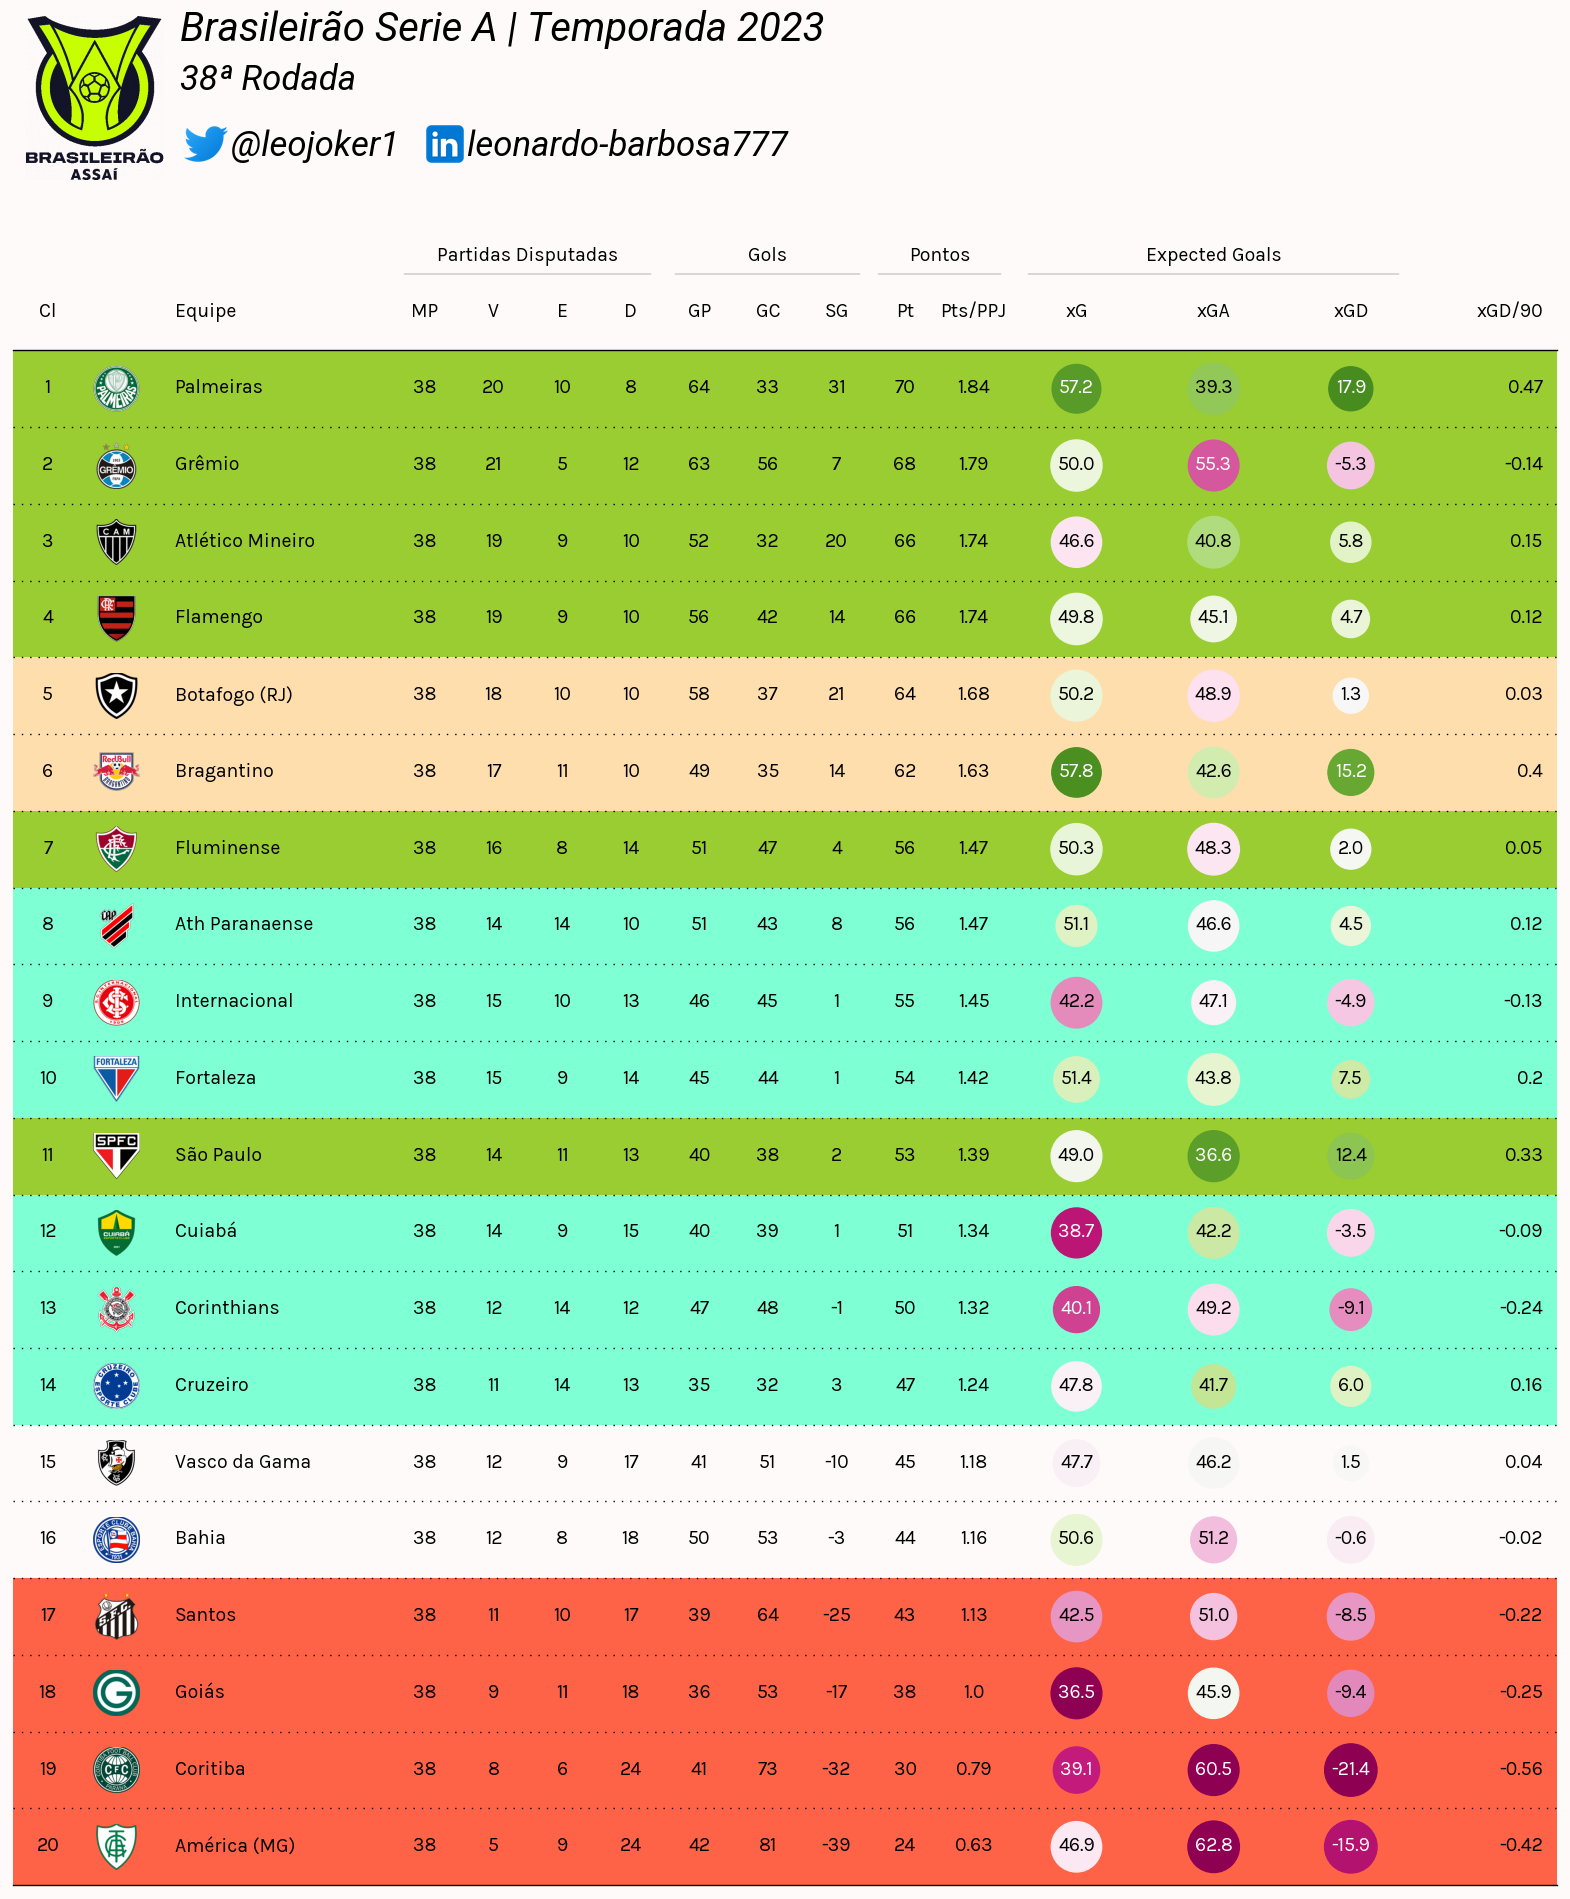

In [43]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Cl",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) 

table.cells[10, 3].textprops["color"] = "#8ACB88"


TITLE = "Brasileirão Serie A | Temporada 2023"
SUB_TITLE = "38ª Rodada"
ASS = "      @leojoker1        leonardo-barbosa777"

# add title
fig.text(0.21, 0.95, TITLE, size=29, color="black", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.21, 0.94, SUB_TITLE, color="black",
    size=25, fig=fig, fontproperties=font_bold.prop
)
# add signature
fig_text(
    0.21, 0.91, ASS, color="black", size=25, fontproperties=font_bold.prop
)


# Adicione a imagem do campeonato
fig.figimage(br23, xo=25, yo=1710, origin='upper', zorder=10)  # Ajuste as coordenadas conforme necessário

# Adicione o ícone do Twitter
twitter_icon_path = "D:/pythonProject/Tutoriais/images/x.png"  # Substitua pelo caminho correto
twitter_icon = Image.open(twitter_icon_path)
n_size = (50,50)
twitter_icon = twitter_icon.resize(n_size)
fig.figimage(twitter_icon, xo=180, yo=1730, origin='upper')


# Adicione o ícone do linkedin
linkedin_icon_path = "D:/pythonProject/Tutoriais/images/linkedin.png"  # Substitua pelo caminho correto
linkedin_icon = Image.open(linkedin_icon_path)
n_size = (50,50)
linkedin_icon = linkedin_icon.resize(n_size)
fig.figimage(linkedin_icon, xo=420, yo=1730, origin='upper')



for idx in [0, 1, 2, 3, 6, 10]:#Classificação dos times
    table.rows[idx].set_facecolor(row_colors["Libertadores"])
#
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["Pre"])

for idx in [7,8,9,11,12,13]:
    table.rows[idx].set_facecolor(row_colors["Sula"])    
#
#
for idx in [16,17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["Queda"])

fig.savefig(
    "D:/pythonProject/Tutoriais/images/brasileirão23.png",
    facecolor=ax.get_facecolor(),
    dpi=300,
    bbox_inches="tight",
)
fig.show()